In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
df = pd.read_csv(os.path.join(r'C:\Users\anika\New York Airbnb\Data\Prepared Data\Task 6.2.csv'))
df.head()

,Unnamed: 0,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [4]:
#Isolate Numeric variables
numeric = df.select_dtypes(include="number")   # keeps only numeric columns
scaler  = StandardScaler()
X       = scaler.fit_transform(numeric)

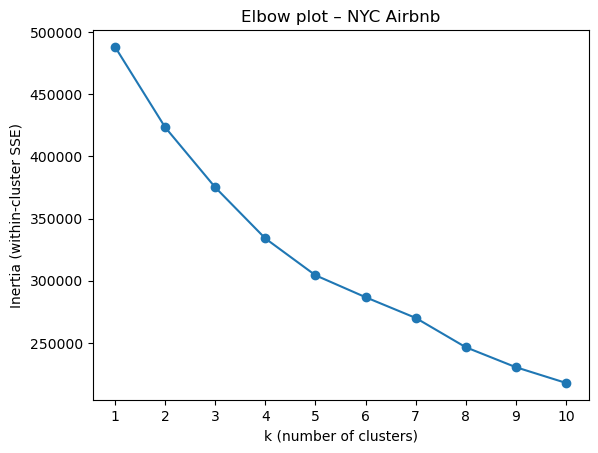

In [5]:
#Elbow Method
inertias = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, n_init="auto", random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(K, inertias, "o-")
plt.xticks(K)
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia (within‑cluster SSE)")
plt.title("Elbow plot – NYC Airbnb")
plt.show()

In [7]:
##The curve shows a sharp drop up to k = 4, then levels off—so I’ll use 4 clusters.


In [6]:
#run kmeans 
k = 4                                         
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
df["cluster"] = kmeans.fit_predict(X)

df["cluster"].value_counts()

cluster
2    28756
3    12847
0     5803
1     1410
Name: count, dtype: int64

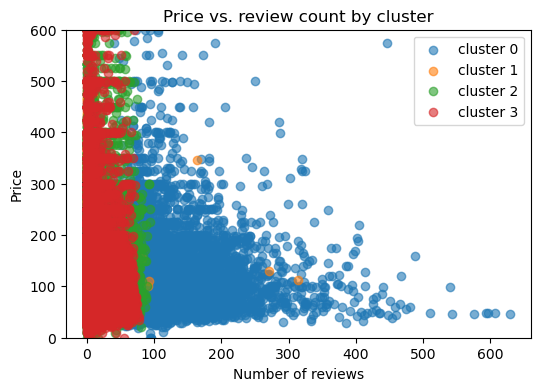

In [9]:
plt.figure(figsize=(6, 4))

# loop through each cluster and plot its points
for c in sorted(df["cluster"].unique()):
    subset = df[df["cluster"] == c]
    plt.scatter(
        subset["number_of_reviews"],
        subset["price"],
        label=f"cluster {c}",
        alpha=0.6
    )

# optional: limit y‑axis to hide extreme prices
plt.ylim(0, 600)

plt.xlabel("Number of reviews")
plt.ylabel("Price")
plt.title("Price vs. review count by cluster")
plt.legend()
plt.show()

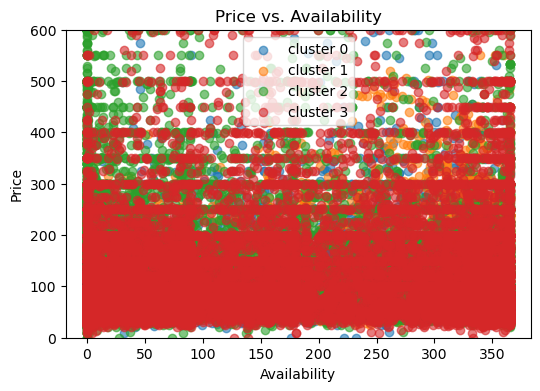

In [10]:
plt.figure(figsize=(6, 4))

# loop through each cluster and plot its points
for c in sorted(df["cluster"].unique()):
    subset = df[df["cluster"] == c]
    plt.scatter(
        subset["availability_365"],
        subset["price"],
        label=f"cluster {c}",
        alpha=0.6
    )

# optional: limit y‑axis to hide extreme prices
plt.ylim(0, 600)

plt.xlabel("Availability")
plt.ylabel("Price")
plt.title("Price vs. Availability")
plt.legend()
plt.show()

In [11]:
#Summarize Cluster
grp = (df.groupby("cluster")
      [["price", "latitude", "longitude", "minimum_nights",
        "number_of_reviews", "reviews_per_month",
        "availability_365", "calculated_host_listings_count"]]
      .median()     
      .round(1)) 
grp

,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
cluster,,,,,,,,
0,100.0,40.7,-74.0,2.0,102.0,3.0,187.0,1.0
1,220.5,40.7,-74.0,30.0,0.0,0.0,311.0,103.0
2,110.0,40.7,-74.0,3.0,4.0,0.2,0.0,1.0
3,99.0,40.7,-73.9,2.0,4.0,1.0,163.0,1.0


In [12]:
##How cluster can help
#Help with pricing strategy, if Cluster 0 commands a price premium, new hosts in the same geo‑band can benchmar##Hk against that tariff.
#Target Cluster 2 with short‑stay promos; push long‑stay discounts to Cluster 1.


In [7]:
#Save cluster dataset
df.to_excel("airbnb_with_clusters.xlsx", index=False)